In [1]:
#Imports
import netCDF4 as nc
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [2]:
# Function to extract latitude and longitude from a NetCDF file
def extract_lat_lon(nc_file):
    with nc.Dataset(nc_file) as dataset:
        latitude = dataset.variables['latitude'][:]
        longitude = dataset.variables['longitude'][:]
    return latitude, longitude

In [3]:
# Replace 'file1.nc' and 'file2.nc' with the actual file paths
data_dir = '/home/samin/data/FVCOME_OUTPUT/simulations/horon/output/moredata/202306/endpoint'


In [4]:
# Get a list of all NetCDF files in the directory
nc_files = [f for f in os.listdir(data_dir) if f.endswith('.nc')]

# create an empty DataFrame
df_start = pd.DataFrame()

# Iterate through each NetCDF file and save latitude and longitude in separate columns
for nc_file in sorted(filter(lambda x: x.endswith("pylag_1.nc"), os.listdir(data_dir)), key=lambda x: int(x.split(".")[0].split("_")[1])):
    file_path = os.path.join(data_dir, nc_file)
    latitude, longitude = extract_lat_lon(file_path)

    # Flatten latitude and longitude arrays
    latitude = latitude.flatten()
    longitude = longitude.flatten()

    # Create a DataFrame with 'Latitude' and 'Longitude' columns
    file_df = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude})

    # Add a column for the file name
    file_df['File'] = nc_file

    # Append the DataFrame to the result DataFrame
    df_start = pd.concat([df_start, file_df], ignore_index=True)

In [5]:
# Get a list of all NetCDF files in the directory
nc_files = [f for f in os.listdir(data_dir) if f.endswith('.nc')]

# create an empty DataFrame
df_end = pd.DataFrame()

# Iterate through each NetCDF file and save latitude and longitude in separate columns
for nc_file in sorted(filter(lambda x: x.endswith("pylag_100.nc"), os.listdir(data_dir)), key=lambda x: int(x.split(".")[0].split("_")[1])):
    file_path = os.path.join(data_dir, nc_file)
    latitude, longitude = extract_lat_lon(file_path)

    # Flatten latitude and longitude arrays
    latitude = latitude.flatten()
    longitude = longitude.flatten()

    # Create a DataFrame with 'Latitude' and 'Longitude' columns
    file_df = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude})

    # Add a column for the file name
    file_df['File'] = nc_file

    # Append the DataFrame to the result DataFrame
    df_end = pd.concat([df_end, file_df], ignore_index=True)

        Latitude   Longitude  distance_to_end
0      45.780148  275.276215         0.000000
1      45.765518  275.279755         0.000000
2      45.744976  275.333862         0.000000
3      45.742695  275.350555         0.000000
4      45.718945  275.401306         0.000000
...          ...         ...              ...
67621  43.014374  -82.425224         0.112166
67622  43.010429  -82.423492         0.366841
67623  43.028111  277.565338         2.394397
67624  43.020554  277.570770         0.467602
67625  43.000912  -82.423782         0.706779

[67626 rows x 3 columns]
Minimum Distance: 0.00 kilometers
Maximum Distance: 12.83 kilometers


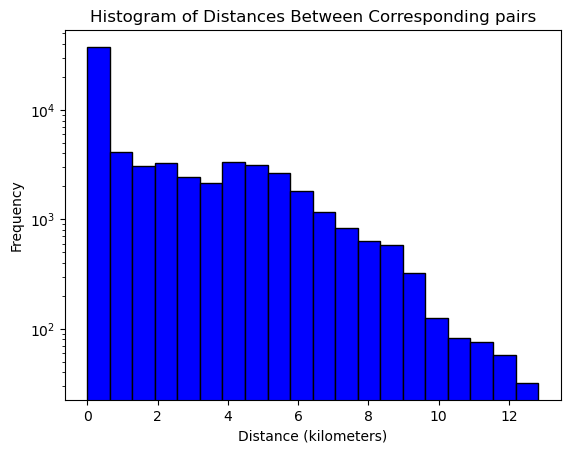

<Figure size 640x480 with 0 Axes>

In [13]:
def calculate_distance(row_start, row_end):
    lat_start, lon_start = row_start['Latitude'], row_start['Longitude']
    lat_end, lon_end = row_end['Latitude'], row_end['Longitude']
    
    coord_start = (lat_start, lon_start)
    coord_end = (lat_end, lon_end)
    
    return geodesic(coord_start, coord_end).kilometers

# Assuming the GeoDataFrames have the same length
if len(df_start) == len(df_end):
    # Calculate distances for each pair of corresponding rows
    distances = [calculate_distance(df_start.iloc[i], df_end.iloc[i]) for i in range(len(df_start))]

    # Add distances to a new column in one of the GeoDataFrames (e.g., df_start)
    df_start['distance_to_end'] = distances

    # Print or visualize the distances
    print(df_start[['Latitude', 'Longitude', 'distance_to_end']])
    #Print the minimum and maximum distances
    min_distance = min(distances)
    max_distance = max(distances)

    print(f"Minimum Distance: {min_distance:.2f} kilometers")
    print(f"Maximum Distance: {max_distance:.2f} kilometers")
    
    # Plotting the GeoDataFrame with distances (optional)
    # Creating a list of different colors for each bin
    # Plotting the histogram of distances
    plt.hist(distances, bins=20, color='blue', edgecolor='black')
    plt.xlabel('Distance (kilometers)')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title('Histogram of Distances Between Corresponding pairs')

    plt.show()
    #fig, ax = plt.subplots()
    #plt.plot(distances, marker='o', linestyle='-', color='blue')
    #df_start.plot(ax=ax, markersize=10, color='blue', alpha=0.7, label='Start Points')
    #df_end.plot(ax=ax, markersize=10, color='red', alpha=0.7, label='End Points')
    #ax.legend()
    #ax.set_title('Distances between Start and End Points')
    #plt.show()
    #     name = os.path.join(output_directory, f'figure_{i}.png')
    plt.savefig('/home/samin/data/distance3.png')
    
    plt.show()
else:
    print("Error: GeoDataFrames have different lengths.")
